# Exploratory Data Analysis On Credit Score Classification

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques.It is used to discover trends,
patterns, or to check assumptions with the help of statistical summary and graphical representations. 

The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set,
while providing all of the specific items that an analyst would want to extract from a data set, such as: a good-fitting, 
parsimonious model.

# Introduction


Credit Score  are one of the common risk control methods in the financial industry which uses personal information and 
transactional records to identify and evaluate the creditworthiness of existing and potential customers. There are a number of
different use cases leveraging this measure such as loan management, credit card approval, credit limit extension, etc.
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history.
Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose , a consumer work in a finance
company which specialises in lending various types of loans to urban customers. So finance company worker use the credit score .  
To analyse the patterns present in the data with the help of EDA. This will ensure that the applicants are capable of repaying 
the loan are not rejected. When the company receives a loan application, the company has to decide for loan approval based on 
the applicant’s profile(credit Score). This is why data Analytics come in action.

About DataSet :
This dataset consists of two separate CSV files : train and tests. There are more than 10000 rows and 26columns in train file which contains the summary of all  consumers while the dataset deliveries is quite large with 150460 rows and 27 column which reprsents data of each credit score.
I will be using Python 3 to analysis this data and am doing this project on jupyter notebook . The libraries / packages that will be use in the projects areNumpy,Pandas,Matplotlib,Seaborn,Warnings.


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Loading data into dataframe and printing first five rows

In [2]:
credit_data1 = pd.read_csv("train.csv")
credit_data1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Shape of the dataset

In [3]:
credit_data1.shape

(100000, 28)

The dataset consists of 27 columns and 500000 rows.

# Data cleaning

# Looking at the datatypes of the data

In [4]:
credit_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Here, the columns - Month, Occupation, Type_of_Loan, 
Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, 
Credit_Score are categorical.  Modify the datatypes 
of these columns to category.


In [5]:
### Changing the datatype of the above mentioned columns to category

credit_data1.Month = credit_data1.Month.astype('category')
credit_data1.Occupation = credit_data1.Occupation.astype('category')
credit_data1.Type_of_Loan = credit_data1.Type_of_Loan.astype('category')
credit_data1.Credit_Mix = credit_data1.Credit_Mix.astype('category')
credit_data1.Payment_of_Min_Amount = credit_data1.Payment_of_Min_Amount.astype('category')
credit_data1.Payment_Behaviour = credit_data1.Payment_Behaviour.astype('category')
credit_data1.Credit_Score = credit_data1.Credit_Score.astype('category')

Looking at the modified datatypes 
of the columns in both the datasets.

In [6]:
### Looking at the modified datatypes of the data

credit_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

From the above data,  There are a few columns that have an improper datatype. The columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance are object datatyped but they should be a number datatype like int or float.

Now, Change the datatype of these columns from object to a numerical datatype like int or float.

In [7]:
### A function to remove the '_' in the data

def removeUnderscore(value):
    first_index = 0
    last_index = len(value) - 1
    while first_index <= last_index:
        if value[first_index] == '_':
            first_index += 1
        if value[last_index] == '_':
            last_index -= 1
        if '_' not in value[first_index : last_index + 1]:
            if value[first_index : last_index + 1] == '':
                return 0
            else:
                return value[first_index : last_index + 1]
    

def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(credit_data1[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))
        
        credit_data1[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])

Now, Removed all the underscores (_) in the data.
Now, let's look at the datatypes of the columns in the datasets,
focusing on the columns we have changed in the above cell.

In [8]:
### Looking at the datatypes of the data

credit_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

From the above data,  The datatype 
of the columns - Age, Annual_Income, Num_of_Loan,
Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, 
Amount_invested_monthly, Monthly_Balance have changed from Object 
to Float. There are missing values in the dataset.
Now, lets look at the columns that have missing values.

In [9]:
### Missing data by columns in the dataset
credit_data1.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

From the above data, There are missing 
values in the columns - Monthly_Inhand_Salary, Type_of_Loan, 
Name, Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly,
Num_Credit_Inquiries, Monthly_Balance. Now, lets look where these missing values are present in these columns i.e., whether these values
are clustered at a single place or scattered in the data.

From the above data, The missing values in the data are scattered, not clustered at a single place.

In [10]:
### Summary statistics of the numerical columns in the dataset
credit_data1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


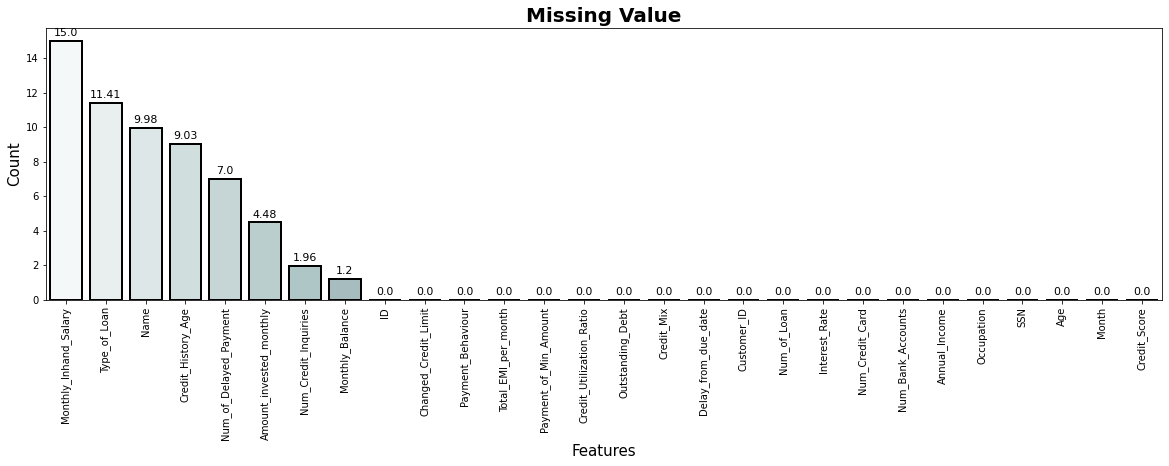

In [11]:
Value_Missing = credit_data1.isnull().sum().sort_values(ascending = False)
percent_missing = (credit_data1.isnull().sum() * 100 / len(credit_data1)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

From the above summary statistics, There are outliers present in the data. 
Take care of these in the next sections.

 Feature Analysis
 Categorical variable - Occupation

In [12]:
### Value counts of the column - Occupation
occupation_count = credit_data1['Occupation'].value_counts(dropna = False)
occupation_count

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [13]:
### Fetching the not null data of the column - Type of Data 

index_values = ~credit_data1['Type_of_Loan'].isnull().values
loan_type_data = list(credit_data1['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [14]:
### Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [15]:
### Value counts of the column - Credit_Mix

credit_mix_count = credit_data1['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [16]:
### Value counts of the column - Payment_of_Min_Amount

min_amount_count = credit_data1['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

From the above graph, we can see that the above graph has a high degree of skewness. That the distribution is right skewed and has a slight degree of skewness.

# 4. Data preprocessing


Data preprocessing is the process of getting our dataset ready for model training. In this section, the following preprocessing steps:

1.Detect and remove outliers in numerical variables
2.Drop and fill missing values


4.1 Detect and remove outliers in numerical variables¶
Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, Count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [17]:
from collections import Counter

In [18]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

numerical_columns = list(credit_data1.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(credit_data1, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 484 indices:  [1293, 2902, 3189, 3690, 7036, 7882, 8558, 8660, 9736, 9879, 10840, 12673, 13036, 13486, 15026, 17379, 17827, 18004, 18349, 20250, 20537, 20538, 22612, 24240, 24736, 25123, 25603, 25878, 25923, 27836, 27875, 28278, 30249, 31288, 31399, 31985, 33553, 34160, 34565, 34582, 35270, 35783, 36015, 36053, 36855, 36985, 37534, 39169, 39393, 41557, 41749, 43050, 44633, 44634, 45410, 46737, 47961, 48455, 48536, 48794, 50233, 51828, 53352, 54009, 54030, 56161, 56166, 58772, 59049, 60088, 60659, 61146, 61938, 62054, 63816, 64165, 65928, 68449, 68810, 69041, 73756, 76155, 77767, 78865, 78900, 81038, 81041, 82992, 83102

In [19]:
credit_data1.iloc[outliers_to_drop, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,...,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,!@9#%8,269.053164,Good
2902,0x2700,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,...,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
3189,0x28af,CUS_0x3fa8,June,Kumarp,471.0,283-56-6375,Writer,177243.920,14526.326667,4,...,Good,488.95,37.041853,28 Years and 9 Months,NM,284.804197,485.387942,!@9#%8,942.440528,Standard
3690,0x2ba0,CUS_0x29b2,March,Martinnet,1170.0,626-80-0791,Media_Manager,59930.040,5207.170000,7,...,Bad,4474.29,32.303684,1 Years and 11 Months,Yes,156.596164,165.383895,High_spent_Medium_value_payments,448.736941,Standard
7036,0x3f3a,CUS_0x3949,May,Scotto,6520.0,908-89-0498,Musician,63353.680,5356.473333,9,...,Bad,4362.52,31.463332,1 Years and 2 Months,NM,390.451288,233.035327,Low_spent_Large_value_payments,182.160718,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96585,0x24bef,CUS_0xbe4d,February,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,28.977497,5 Years and 4 Months,Yes,446.366715,118.788667,High_spent_Medium_value_payments,266.862618,Standard
96586,0x24bf0,CUS_0xbe4d,March,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,NaN,7,...,Bad,4320.49,24.809802,5 Years and 5 Months,Yes,446.366715,287.084007,Low_spent_Medium_value_payments,128.567278,Poor
96589,0x24bf3,CUS_0xbe4d,June,NaN,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,29.395568,5 Years and 8 Months,Yes,446.366715,545.426595,Low_spent_Small_value_payments,NaN,Poor
96590,0x24bf4,CUS_0xbe4d,July,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,_,4320.49,26.766928,5 Years and 9 Months,Yes,446.366715,168.901072,High_spent_Medium_value_payments,216.750214,Poor


We will drop these rows from the dataset.

In [20]:
### Drop outliers and reset index

print("Before: {} rows".format(len(credit_data1)))
credit_data1 = credit_data1.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(credit_data1)))

Before: 100000 rows
After: 99516 rows


In [21]:
### Lets look at the new dataset

credit_data1

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


4.2 Drop and fill missing values

Here,drop the columns - ID, Customer_ID, Name, SSN, Credit_Mix, Num_of_Loan, Credit_Utilization_Ratio, Credit_History_Age, Payment_Behavior, Annual_Income, Monthly_Balance, Num_Bank_Accounts, Num_Credit_Card from the datasets.

### Dropping the columns from the dataset

credit_data1.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_Mix', 'Num_of_Loan',
             'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_Behaviour', 
             'Annual_Income', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card'], axis = 1, inplace = True)
credit_data1

In [22]:
### Looking at the missing values in the dataset

credit_data1.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       14931
Type_of_Loan                11392
Name                         9939
Credit_History_Age           8985
Num_of_Delayed_Payment       6972
Amount_invested_monthly      4452
Num_Credit_Inquiries         1949
Monthly_Balance              1175
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

From the above data, That there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries. Here, we will focus on removing the missing values in the columns - Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, and Num_Credit_Inquiries. However, we will replace the missing values in the column - Type_of_Loan in the Feature Engineering section.

 Handling missing values - Monthly_Inhand_Salary
Here, for replacing the missing values in the column - Monthly_Inhand_Salary,The column Credit_Score and find the mean of the salary based on the Credit Score.

In [23]:
### Finding the mean value of the column - Monthly_Inhand_Salary in the dataset using Credit_Score

salary_good_mean = np.mean(credit_data1[credit_data1['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(credit_data1[credit_data1['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(credit_data1[credit_data1['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])

(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5379.96572347794, 3371.8477025147367, 4238.793604735017)

In [24]:
### Finding the indices of the rows where Monthly_Inhand_Salary is null

index_values = list(credit_data1['Monthly_Inhand_Salary'].isnull())
print(index_values)

[False, True, True, True, False, True, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fals

In [25]:
### Checking if there are any missing values of Monthly_Inhand_Salary in the dataset

credit_data1['Monthly_Inhand_Salary'].isnull().sum()

14931

We replaced all the missing values present in the column - Monthly_Inhand_Salary.

Handling missing values - Num_of_Delayed_Payment

Here, we will use the median to replace the missing values in the column - Num_of_Delayed_Payment.

### Finding the median value of the column - Num_of_Delayed_Payment in the dataset



In [26]:
payment_index = list(~credit_data1['Num_of_Delayed_Payment'].isnull())
median_payment = np.median(credit_data1['Num_of_Delayed_Payment'].loc[payment_index])
median_payment

14.0

In [27]:
### Replacing the missing values of the column - Num_of_Delayed_Payment in the dataset
credit_data1['Num_of_Delayed_Payment'].fillna(median_payment, inplace = True)

In [28]:
### Checking if there are any missing values of Num_of_Delayed_Payment in the dataset

credit_data1['Num_of_Delayed_Payment'].isnull().sum()

0

We replaced all the missing values present in the column - Num_of_Delayed_Payment.

 Handling missing values - Amount_invested_monthly
Here, we will use the median to replace the missing values in the column - Amount_invested_monthly.

### Finding the median value of the column - Amount_invested_monthly in the dataset



In [29]:
amount_index = list(~credit_data1['Amount_invested_monthly'].isnull())
median_amount = np.median(credit_data1['Amount_invested_monthly'].loc[amount_index])
median_amount

135.91926936353195

In [30]:
### Replacing the missing values of the column - Amount_invested_monthly in the dataset

credit_data1['Amount_invested_monthly'].fillna(median_amount, inplace = True)

In [31]:
### Checking if there are any missing values of Amount_invested_monthly in the dataset

credit_data1['Amount_invested_monthly'].isnull().sum()

0

We replaced all the missing values present in the column - Amount_invested_monthly.

 Handling missing values - Num_Credit_Inquiries¶
Here, we will use the median to replace the missing values in the column - Num_Credit_Inquiries.

### Finding the median value of the column - Num_Credit_Inquiries in the dataset

In [32]:
inquiries_index = list(~credit_data1['Num_Credit_Inquiries'].isnull())
median_inquiries = np.median(credit_data1['Num_Credit_Inquiries'].loc[inquiries_index])
median_inquiries

6.0

In [33]:
### Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

credit_data1['Num_Credit_Inquiries'].fillna(median_inquiries, inplace = True)

In [34]:
### Checking if there are any missing values of Num_Credit_Inquiries in the dataset

credit_data1['Num_Credit_Inquiries'].isnull().sum()

0

In [35]:
credit_data1

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


We replaced all the missing values present in the column - Num_Credit_Inquiries.

In [36]:
### Looking if the dataset has any more missing values apart from Type_of_Loan

credit_data1.isnull().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       14931
Type_of_Loan                11392
Name                         9939
Credit_History_Age           8985
Monthly_Balance              1175
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Num_Credit_Inquiries            0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

Since, there are no missing values in the data apart from the data in the column - Type_of_Loan (which we will deal in the Feature Engineering), we can proceed to perform Feature Engineering.

In [37]:
credit_data1.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,NaN,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [38]:
credit_data1.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9939
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14931
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11392
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8985
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance              1175
Credit_Score                    0
dtype: int64

In [39]:
credit_data1.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [40]:
df=credit_data1.dropna() 
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [41]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [42]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


# UNIVARIATE ANALYSIS


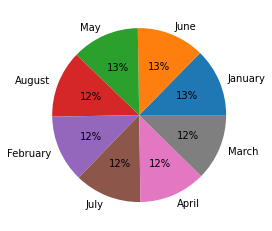

In [43]:
# PIE CHART Month
df10 = df['Month'].value_counts()
plt.pie(df10, labels=df10.index, autopct="%.0f%%");

<AxesSubplot:xlabel='Month', ylabel='count'>

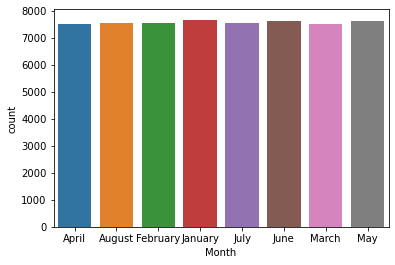

In [44]:
#Month
sns.countplot(df['Month'])

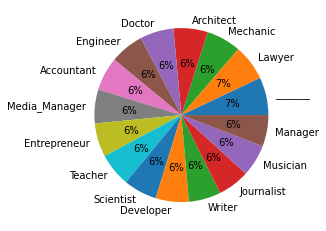

In [45]:
#occupation
# PIE CHART
df10 = df['Occupation'].value_counts()
plt.pie(df10, labels=df10.index, autopct="%.0f%%");

Minimum SP: 7005.93
Maximum SP: 24198062.0


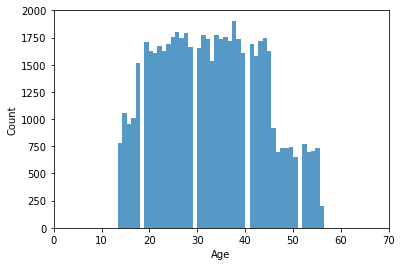

In [46]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Age', data=df)
print("Minimum SP:",df['Annual_Income'].min())
print("Maximum SP:",df['Annual_Income'].max())
ax.set_xlim(0, 70)
ax.set_ylim(0, 2000)

plt.show()

Minimum SP: 7005.93
Maximum SP: 24198062.0


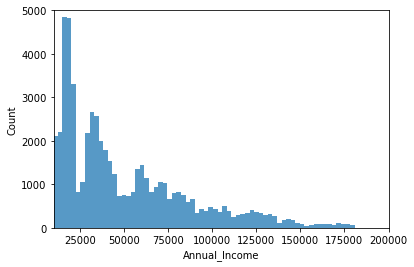

In [47]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Annual_Income', data=df)
print("Minimum SP:",df['Annual_Income'].min())
print("Maximum SP:",df['Annual_Income'].max())
ax.set_xlim(10000, 200000)
ax.set_ylim(0, 5000)

plt.show()

Minimum SP: 303.6454166666666
Maximum SP: 15204.633333333331


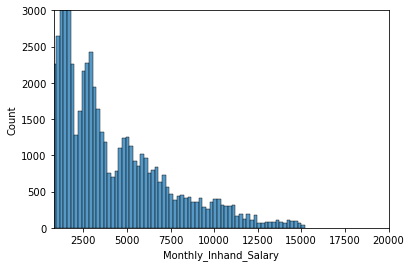

In [48]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Monthly_Inhand_Salary', data=df)
print("Minimum SP:",df['Monthly_Inhand_Salary'].min())
print("Maximum SP:",df['Monthly_Inhand_Salary'].max())
ax.set_xlim(800, 20000)
ax.set_ylim(0, 3000)

plt.show()

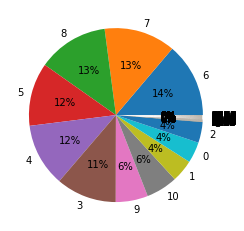

In [49]:
# no. of bank accounts
df1a = df['Num_Bank_Accounts'].value_counts()
plt.pie(df1a, labels=df1a.index, autopct="%.0f%%");

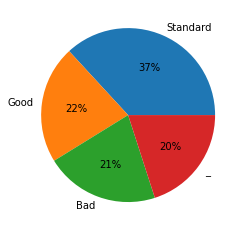

In [50]:
# 2. PIE CHART
df4 = df['Credit_Mix'].value_counts()
plt.pie(df4, labels=df4.index, autopct="%.0f%%");

Text(0.5, 0, 'Occupation')

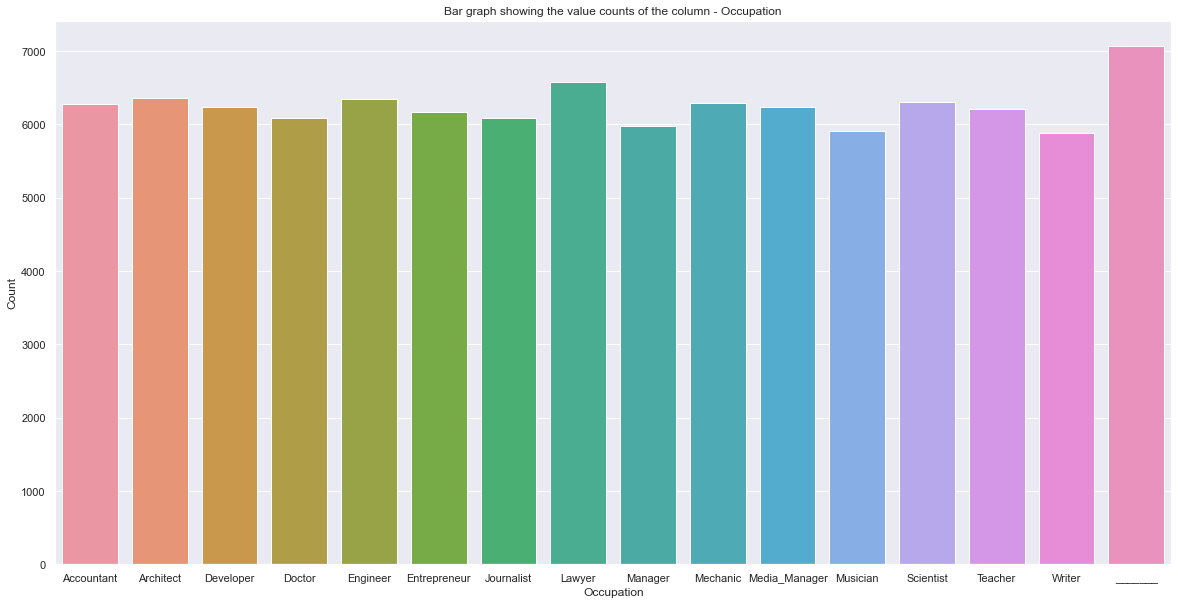

In [51]:
### Bar graph showing the value counts of the column - Occupation
sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(occupation_count.index, occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Occupation', fontsize = 12)

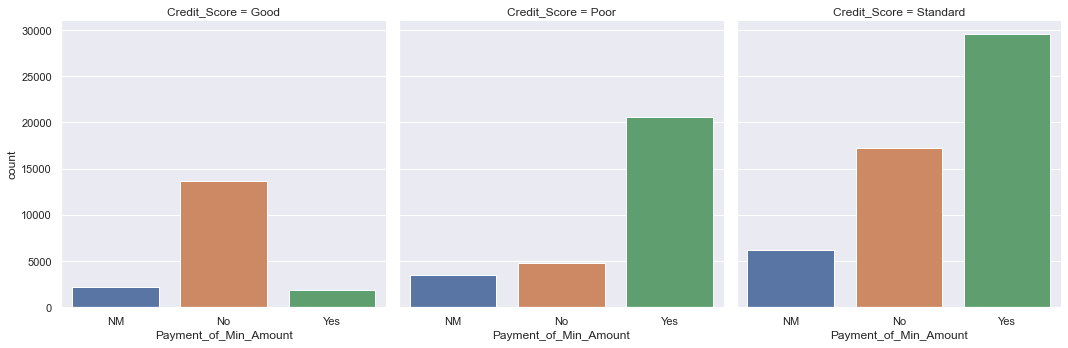

In [52]:
### Distribution of Payment_of_Min_Amount for each Credit Score

sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = credit_data1, kind = 'count', col_wrap = 3)

Minimum SP: 0.23
Maximum SP: 4998.07


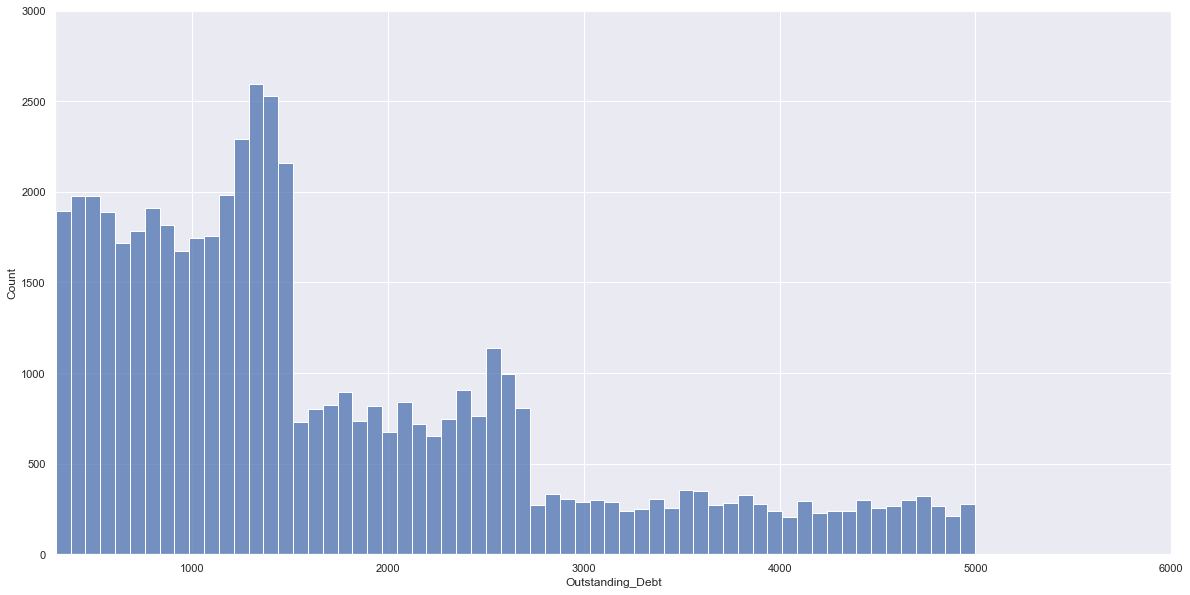

In [53]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Outstanding_Debt', data=df)
print("Minimum SP:",df['Outstanding_Debt'].min())
print("Maximum SP:",df['Outstanding_Debt'].max())
ax.set_xlim(300,6000)
ax.set_ylim(0, 3000)

plt.show()

Minimum SP: 4.4628374669131645
Maximum SP: 82331.0


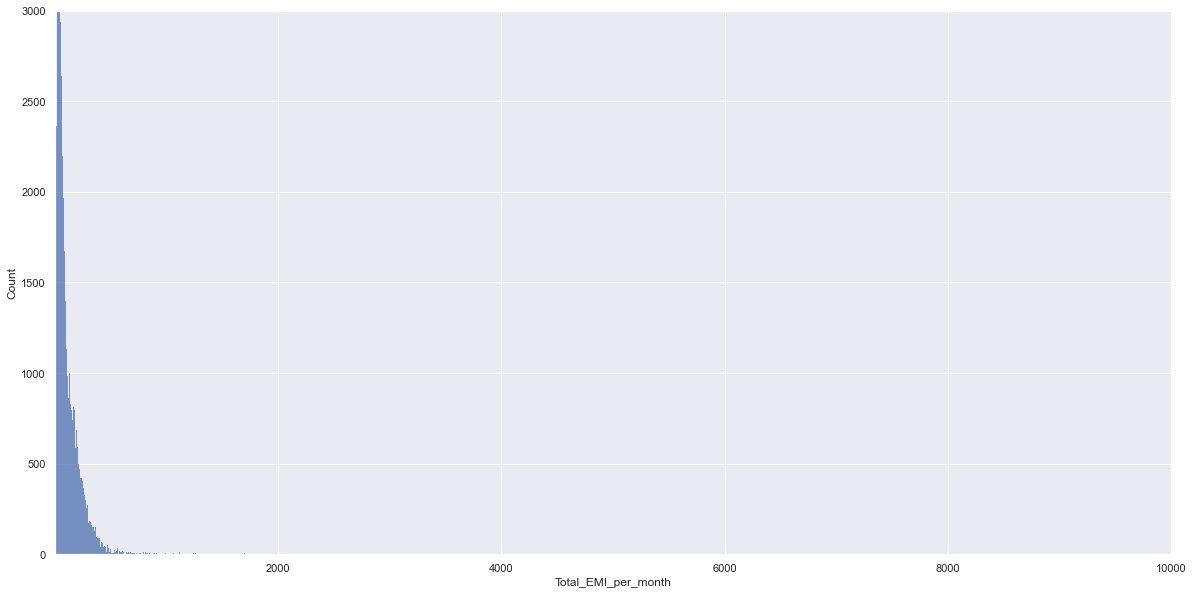

In [54]:
# 1. HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Total_EMI_per_month', data=df)
print("Minimum SP:",df['Total_EMI_per_month'].min())
print("Maximum SP:",df['Total_EMI_per_month'].max())
ax.set_xlim(5,10000)
ax.set_ylim(0, 3000)
plt.show()

In [55]:
df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
16,0x161a,CUS_0x2dbc,January,Langep,34.0,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,!@9#%8,1043.315978,Good


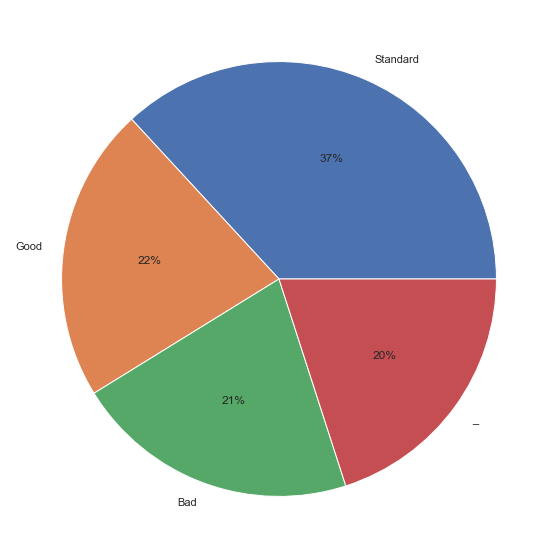

In [56]:
# 2. PIE CHART
df4 = df['Credit_Mix'].value_counts()
plt.pie(df4, labels=df4.index, autopct="%.0f%%");

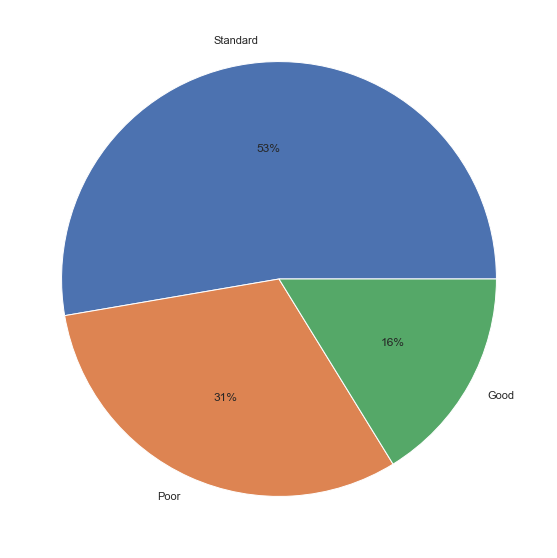

In [57]:
# 2. PIE CHART
df5 = df['Credit_Score'].value_counts()
plt.pie(df5, labels=df5.index, autopct="%.0f%%");

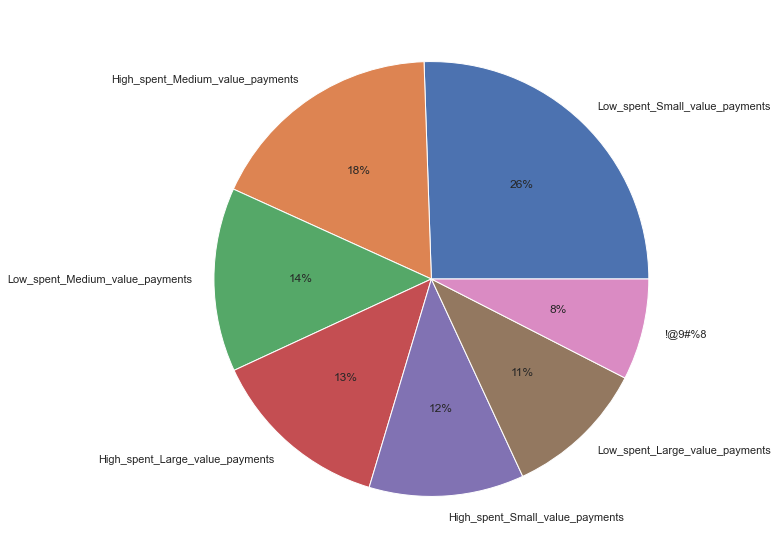

In [58]:
# 2. PIE CHART
df7 = df['Payment_Behaviour'].value_counts()
plt.pie(df7, labels=df7.index, autopct="%.0f%%");

In [59]:
# 1. COUNT PLOT
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_categs = df.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:xlabel='Age'>

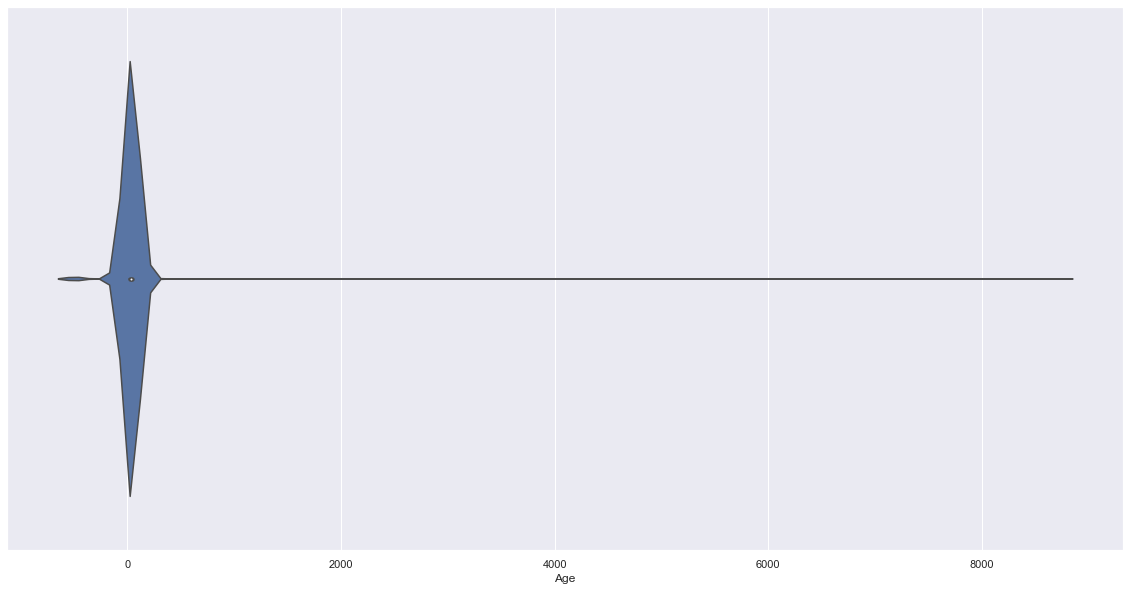

In [60]:
sns.violinplot(x=df["Age"])

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

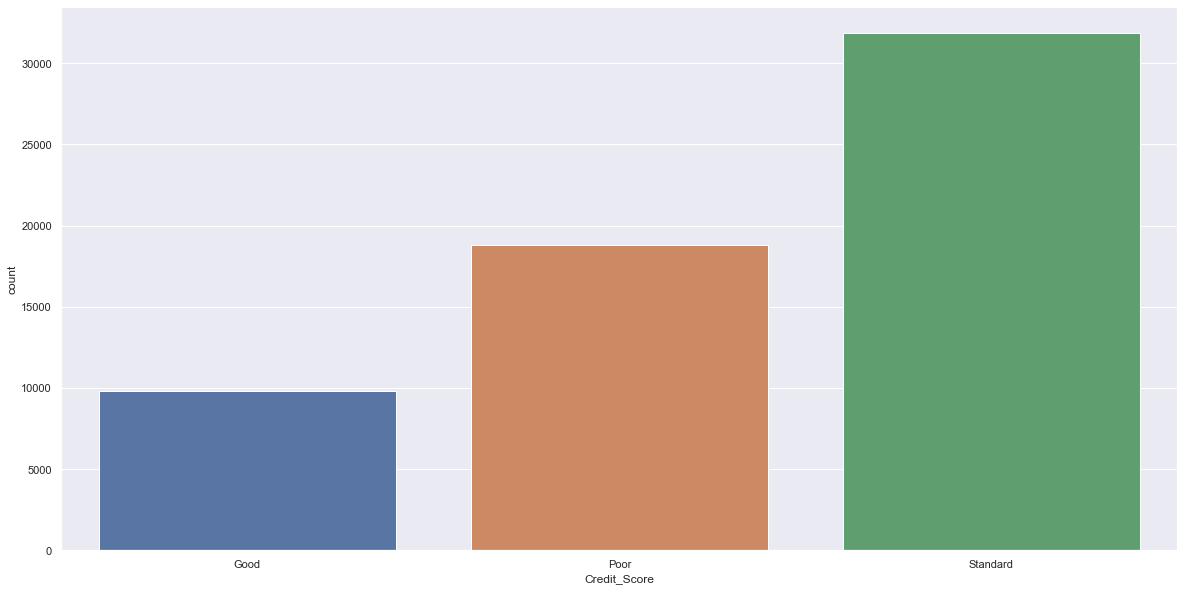

In [61]:
sns.countplot(df['Credit_Score'])

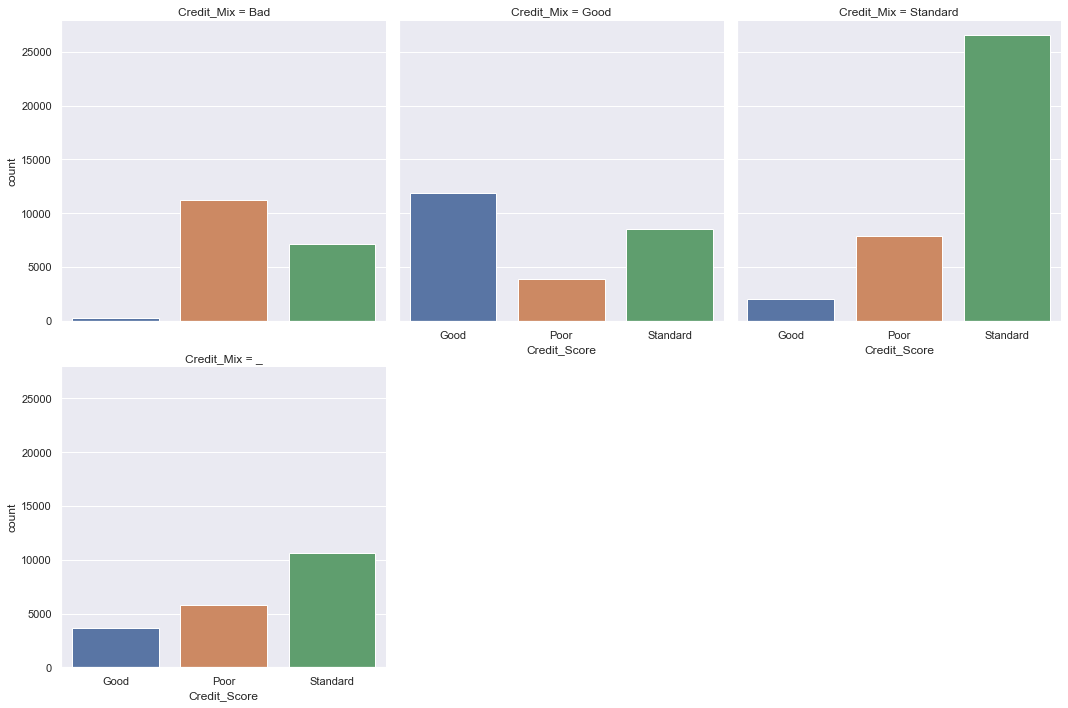

In [62]:
### Distribution of Credit_Score for each Credit_Mix

sns.factorplot('Credit_Score', col = 'Credit_Mix', data = credit_data1, kind = 'count', col_wrap = 3)

# Bivariate analysis

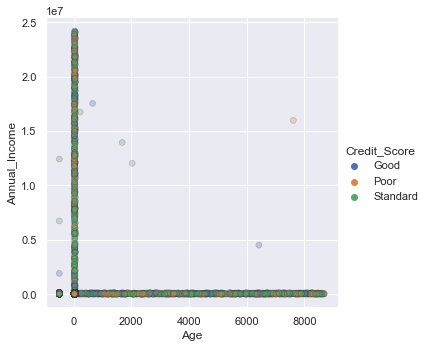

In [63]:
sns.relplot(x = 'Age', y = 'Annual_Income' ,hue = 'Credit_Score', data = df,alpha=.3, 
            edgecolor=".2", linewidth=.5)

<AxesSubplot:xlabel='Annual_Income', ylabel='Monthly_Inhand_Salary'>

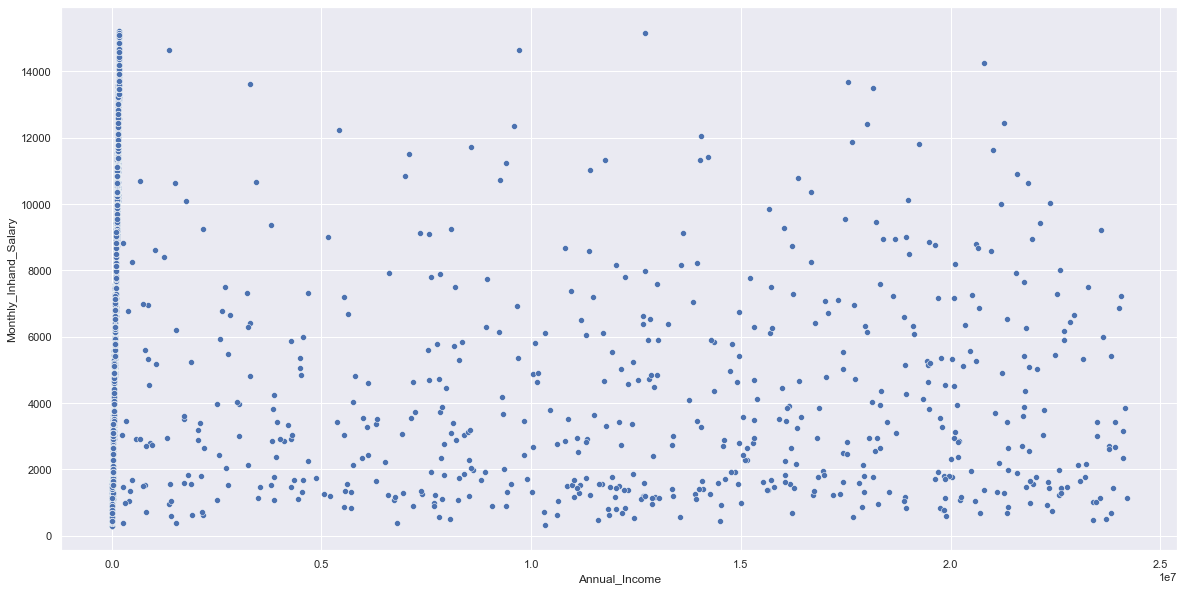

In [64]:
sns.scatterplot(df['Annual_Income'],df['Monthly_Inhand_Salary'])

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

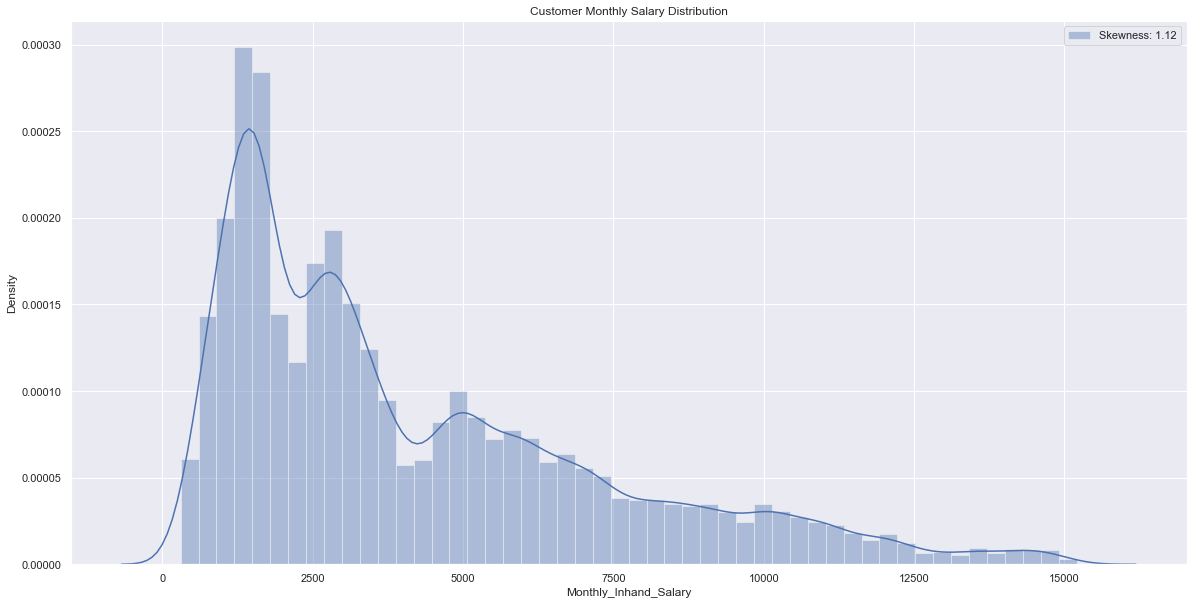

In [65]:
### Understanding the distribution of the column - Monthly_Inhand_Salary
sns.distplot(credit_data1['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(credit_data1['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

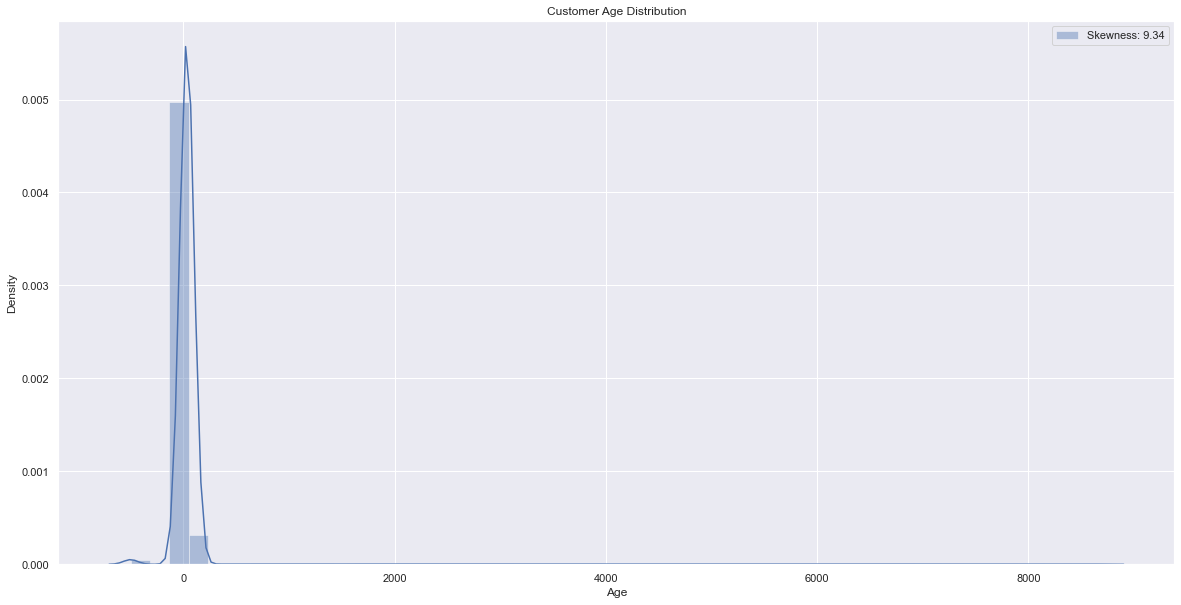

In [66]:
### Understanding the distribution of the column - Age
sns.distplot(credit_data1['Age'], label = 'Skewness: %.2f'%(credit_data1['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

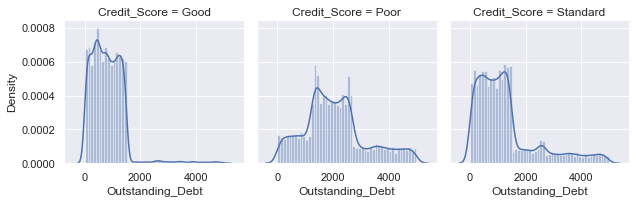

In [67]:
### Outstanding Debt distribution by Credit Score

grid = sns.FacetGrid(credit_data1, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')

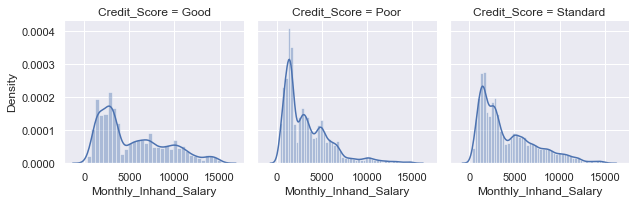

In [68]:
### Monthly Inhand Salary distribution by Credit Score
grid = sns.FacetGrid(credit_data1, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

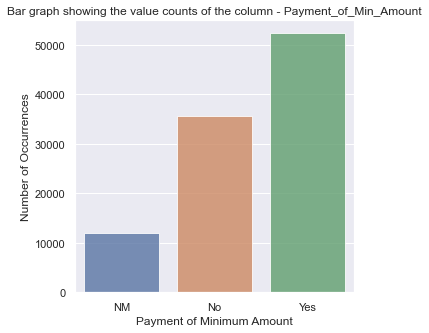

In [69]:
### Bar graph showing the value counts of the column - Payment_of_Min_Amount
sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(min_amount_count.index, min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

# Multivariate Analysis

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

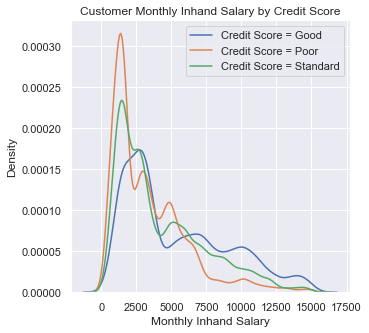

In [70]:

sns.kdeplot(credit_data1['Monthly_Inhand_Salary'][credit_data1['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(credit_data1['Monthly_Inhand_Salary'][credit_data1['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(credit_data1['Monthly_Inhand_Salary'][credit_data1['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

In this graph,  the most of the customer’s 
who have a Poor credit score have a low monthly in hand salary than compared to the customer's who have a Standard and a Good credit score.


Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

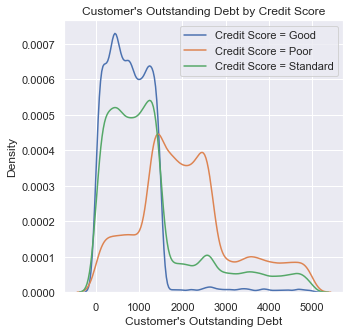

In [71]:
### Merging the above graphs into one

sns.kdeplot(credit_data1['Outstanding_Debt'][credit_data1['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(credit_data1['Outstanding_Debt'][credit_data1['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(credit_data1['Outstanding_Debt'][credit_data1['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

Here graph showing the comperision between credit score with customer outstanding dept

We understand that when we are having 0 outstanding dept then we have good credit.

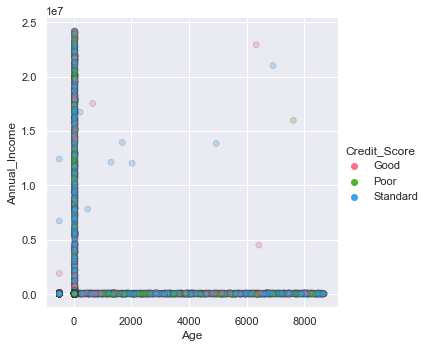

In [72]:
sns.relplot(x = 'Age', y = 'Annual_Income' ,hue = 'Credit_Score', data = credit_data1,alpha=.3, edgecolor=".2", linewidth=.5,palette = 'husl')


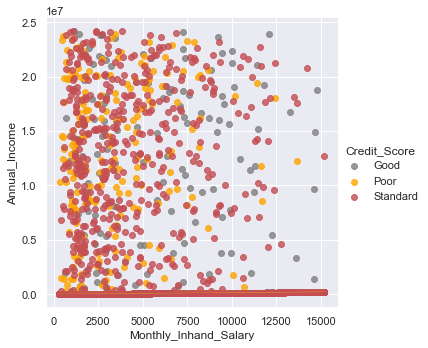

In [73]:
g = sns.lmplot(
    data=credit_data1,
    x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Score",
    height=5,palette= ['Grey','Orange','r'])


<Figure size 720x864 with 0 Axes>

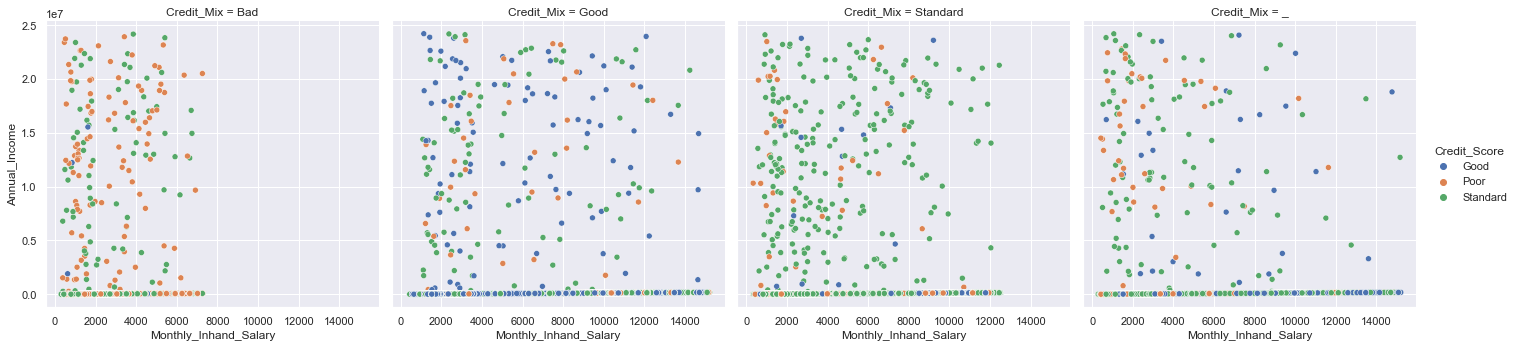

In [74]:
plt.figure(figsize=(10,12))
sns.relplot(data=credit_data1, x="Monthly_Inhand_Salary", y="Annual_Income", 
            hue="Credit_Score",col = 'Credit_Mix', palette="deep")

Here  the graph is showing monthly in hand salary vs Annual income of the
people with different credit score good, bad, standard and mix


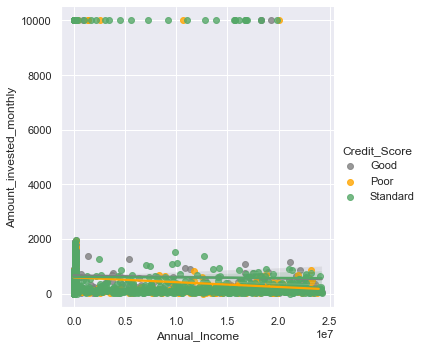

In [75]:
g = sns.lmplot(
    data=credit_data1,
    y="Amount_invested_monthly", x="Annual_Income", hue="Credit_Score",
    height=5,palette= ['Grey','Orange','g'])

Here the graph showing monthly investment of money by the people with annual income.
In this graph standard line is showing people who are investing money more than 1ooo
Where very less people are investing more than 8000 amount
Yellow line is showing poor people who are investing less as their monthly income are more.  


In [76]:
# PROBLEM FACED

For null values I remove the columns by taking threshold value.
I verified the fake location in the column by ploting graph and remove that dataGuidance of my TAI face 
some issue in Jupiter notebook then visualised the data in Tableau and get it easily

# CONCLUSION

13 % of people are taking loan in jan , may and June and in rest month 12%.
Lawyer are taking most of the loan.
Maximum people are taking pay day loan type.
Maximum people 53%  are having standard credit score.
Low spent small value payment method using by 26% of the population
From the above graph which occupation have good credit credit score ,bad or standard so bank or company give loan easily from this data analysis.
Manual efforts will be less using this data analysis .
Those who have less monthly income have low credit score.